In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

C:\Users\Hp\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hp\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hp\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hp\anaconda3\envs\objdet\lib\site-packages\tensorflow\python\framework

In [2]:
# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

In [3]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'images1/image3.jpeg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 6

In [4]:
PATH_TO_CKPT

'F:\\iNeuron\\Facemask detection\\Projectfacemask\\models-master\\research\\inference_graph\\frozen_inference_graph.pb'

In [5]:
PATH_TO_LABELS 

'F:\\iNeuron\\Facemask detection\\Projectfacemask\\models-master\\research\\training\\labelmap.pbtxt'

In [6]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [7]:
category_index

{1: {'id': 1, 'name': 'Face_Mask_found'},
 2: {'id': 2, 'name': 'Face_Mask_not_found'}}

In [8]:
categories

[{'id': 1, 'name': 'Face_Mask_found'},
 {'id': 2, 'name': 'Face_Mask_not_found'}]

In [9]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [10]:


# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")







# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine


# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)



array([[[214, 192, 164],
        [217, 195, 167],
        [221, 199, 171],
        ...,
        [112, 121, 134],
        [108, 116, 129],
        [104, 112, 125]],

       [[215, 193, 165],
        [218, 196, 168],
        [221, 199, 171],
        ...,
        [111, 120, 133],
        [107, 115, 128],
        [103, 111, 124]],

       [[216, 194, 166],
        [219, 197, 169],
        [222, 200, 172],
        ...,
        [110, 119, 133],
        [105, 114, 128],
        [101, 110, 124]],

       ...,

       [[ 35,  57,  82],
        [ 35,  57,  82],
        [ 35,  57,  82],
        ...,
        [117, 124, 141],
        [120, 127, 144],
        [126, 133, 150]],

       [[ 32,  53,  80],
        [ 33,  54,  81],
        [ 33,  54,  81],
        ...,
        [119, 126, 143],
        [120, 127, 144],
        [123, 130, 147]],

       [[ 32,  53,  80],
        [ 33,  54,  81],
        [ 33,  54,  81],
        ...,
        [119, 126, 143],
        [120, 127, 144],
        [123, 130, 147]]

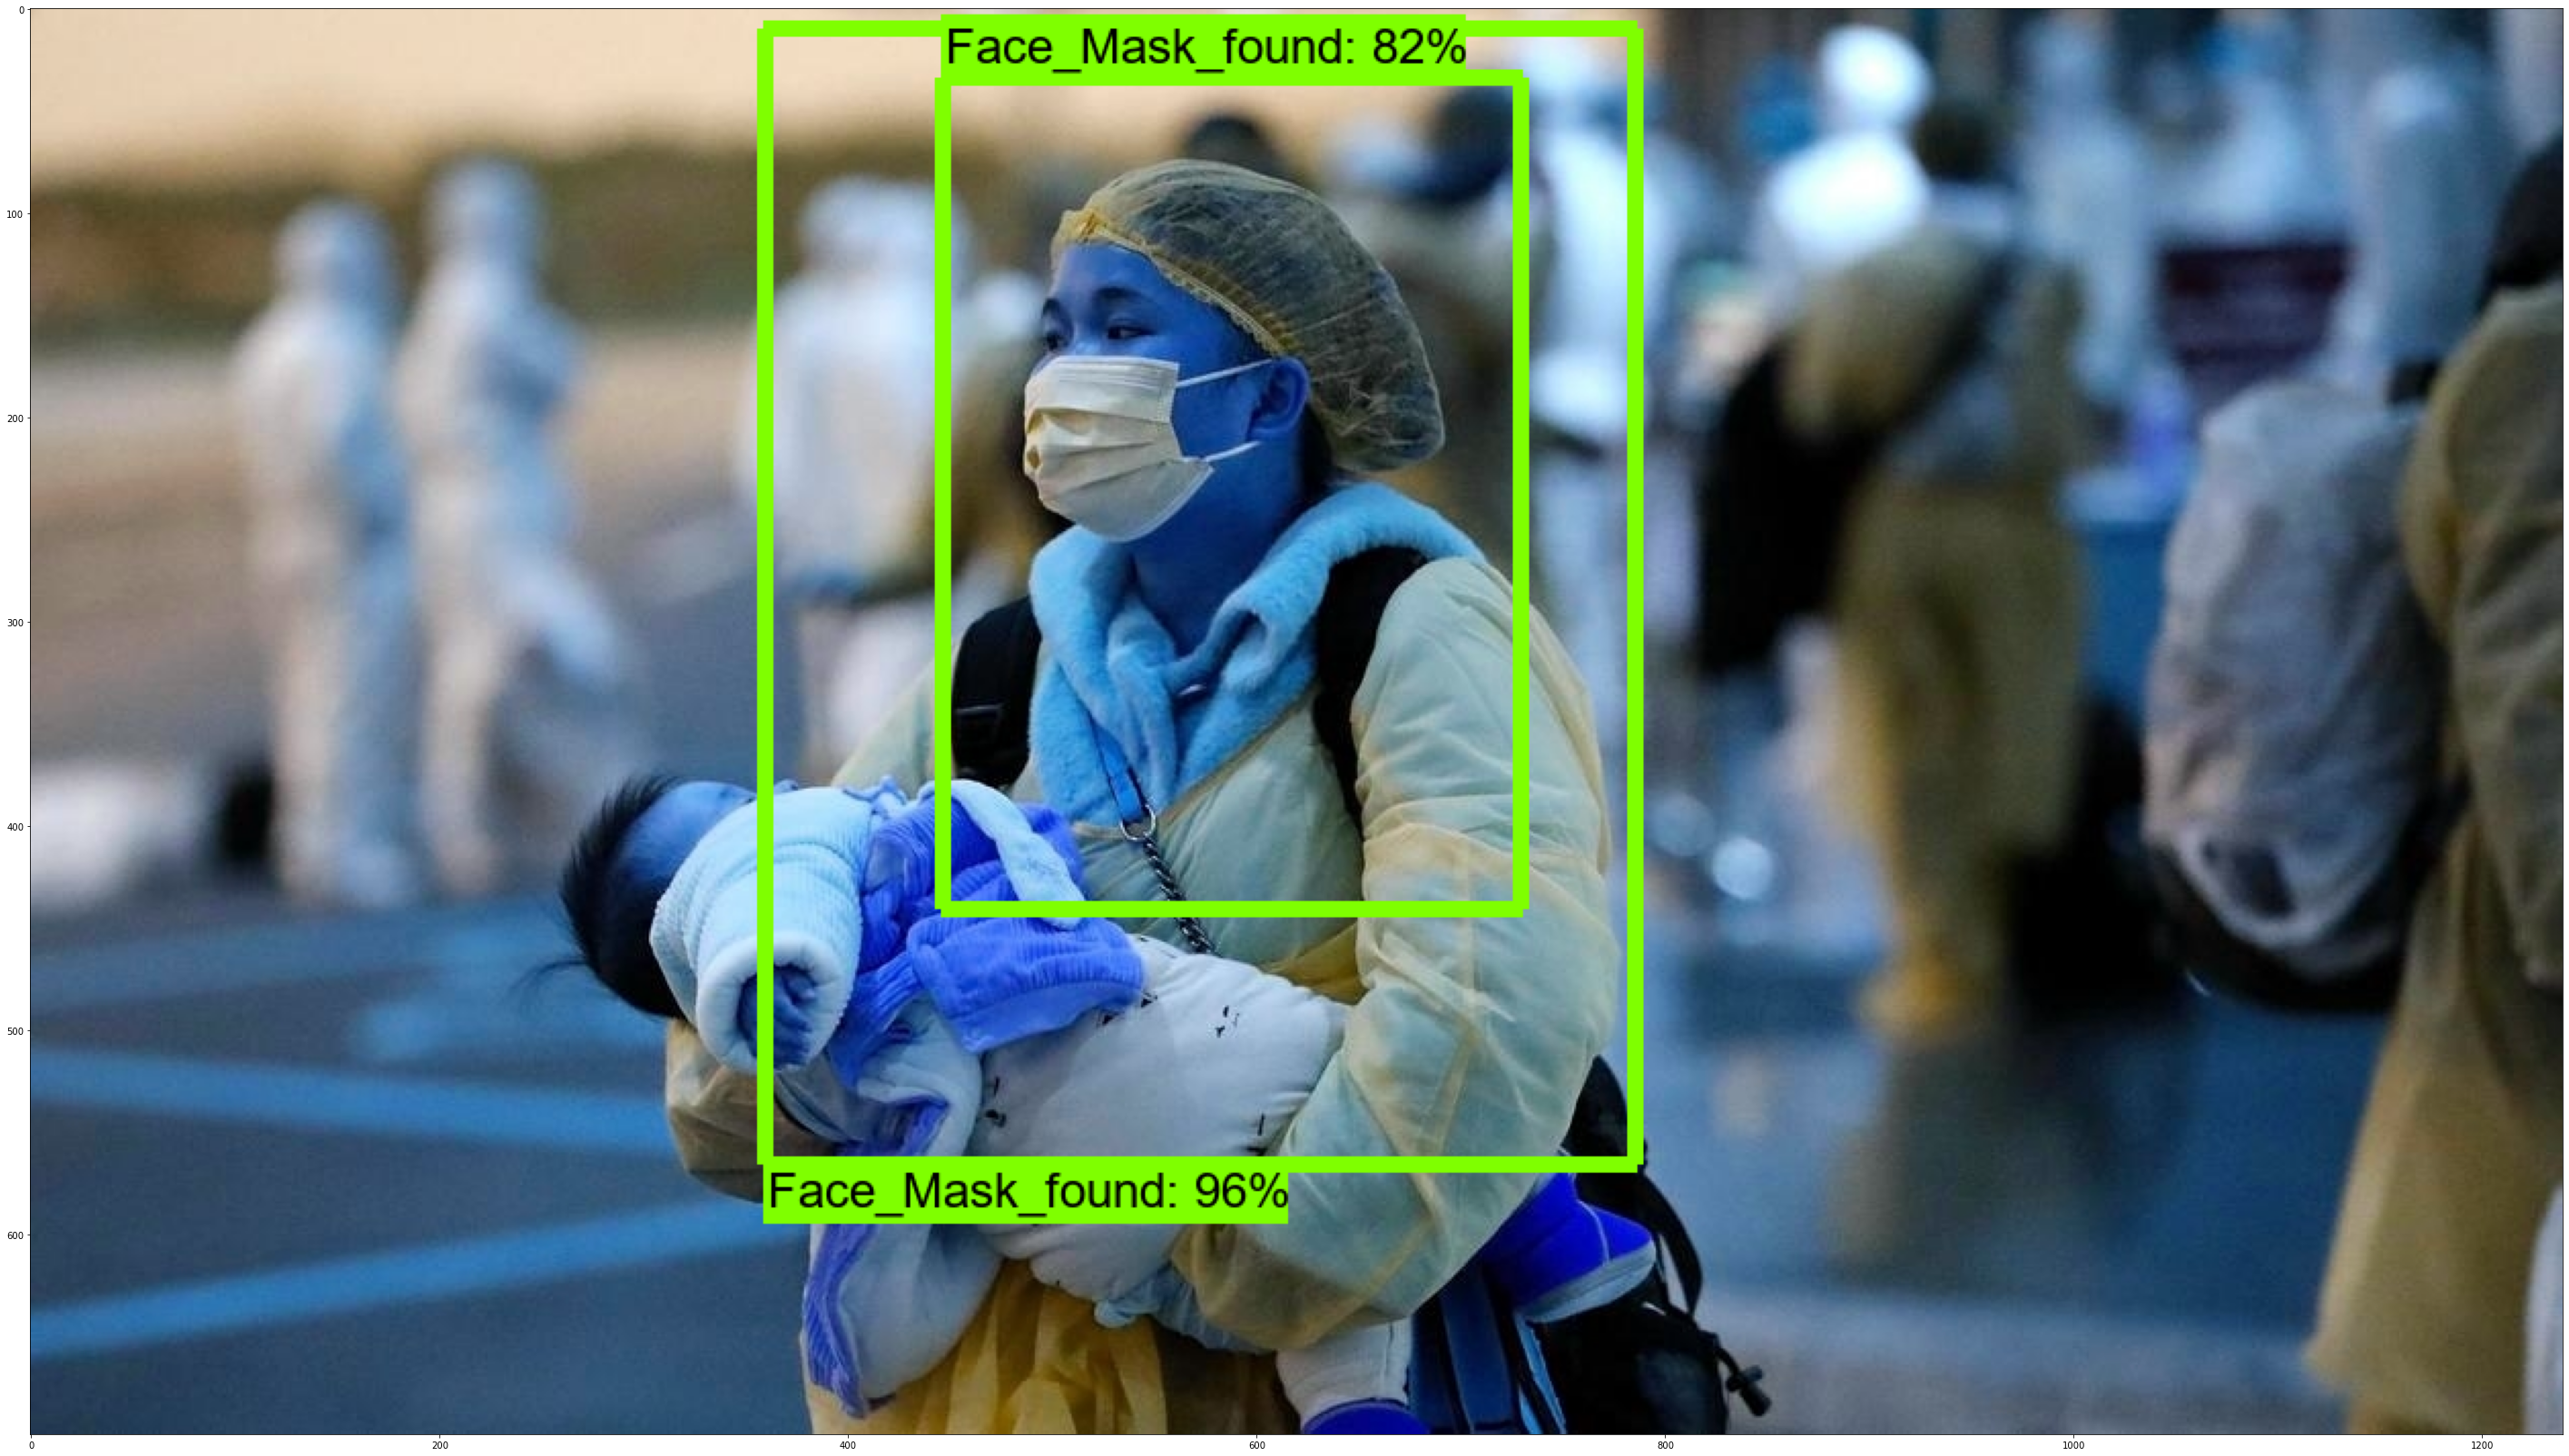

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(50,50))
plt.imshow(image)

In [12]:
# All the results have been drawn on image. Now display the image.
cv2.imshow('Object detector', image)
# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()

In [16]:
# Initialize webcam feed
video = cv2.VideoCapture(0)
ret = video.set(3,1280)
ret = video.set(4,720)

while(True):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    frame_expanded = np.expand_dims(frame, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    cv2.imshow('Object detector', frame)

    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break

# Clean up
video.release()
cv2.destroyAllWindows()